In [1]:
import anomaly_detection

In [2]:
await anomaly_detection.generate_waveforms()

19:09:08.642 | INFO    | prefect.engine - Created task run 'generate_waveforms-bbeeb2f5' for task 'generate_waveforms'

19:09:08.678 | INFO    | Task run 'generate_waveforms-bbeeb2f5' - Waveforms generated!

19:09:08.702 | INFO    | Task run 'generate_waveforms-bbeeb2f5' - Finished in state Completed()

,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,...,point_92,point_93,point_94,point_95,point_96,point_97,point_98,point_99,label,label_function
0,0.958924,0.982641,0.996339,0.999881,0.993230,0.976453,0.949722,0.913309,0.867586,0.813018,...,-0.913309,-0.949722,-0.976453,-0.993230,-0.999881,-0.996339,-0.982641,-0.958924,odd,is_odd_waveform
1,0.283662,0.185520,0.085486,-0.015419,-0.116167,-0.215730,-0.313094,-0.407267,-0.497288,-0.582239,...,-0.407267,-0.313094,-0.215730,-0.116167,-0.015419,0.085486,0.185520,0.283662,even,is_even_waveform
2,-125.000000,-117.576257,-110.452422,-103.622311,-97.079740,-90.818526,-84.832485,-79.115432,-73.661186,-68.463561,...,79.115432,84.832485,90.818526,97.079740,103.622311,110.452422,117.576257,125.000000,odd,is_odd_waveform
3,25.000000,24.000102,23.020610,22.061524,21.122845,20.204571,19.306703,18.429242,17.572187,16.735537,...,18.429242,19.306703,20.204571,21.122845,22.061524,23.020610,24.000102,25.000000,even,is_even_waveform


In [10]:
import spike_detection

df = await spike_detection.generate_spike_waveforms()
df.to_clipboard()

21:33:32.939 | INFO    | prefect.engine - Created task run 'generate_spike_waveforms-dfd1d593' for task 'generate_spike_waveforms'

21:33:32.972 | INFO    | Task run 'generate_spike_waveforms-dfd1d593' - Spike waveforms generated!

21:33:32.994 | INFO    | Task run 'generate_spike_waveforms-dfd1d593' - Finished in state Completed()

In [13]:
import plotly.express as px
# Assuming df is your DataFrame
df_melted = df.melt(id_vars=[df.columns[0]], var_name='Point Index', value_name='Value')

fig = px.line(df_melted, x='Point Index', y='Value', color=df.columns[0], title='Line Plot for Each Row in DataFrame')
fig.show()


In [16]:
spike_detection.spike_detection_flow()

21:36:55.835 | INFO    | prefect.engine - Created flow run 'olive-ringtail' for flow 'spike-detection-flow'

21:36:55.836 | INFO    | Flow run 'olive-ringtail' - View at http://localhost:4200/flow-runs/flow-run/a4f5f126-64fc-48fe-bc0c-18d1cbcf964d

21:36:55.890 | INFO    | Flow run 'olive-ringtail' - Created task run 'generate_spike_waveforms-0' for task 'generate_spike_waveforms'

21:36:55.891 | INFO    | Flow run 'olive-ringtail' - Executing 'generate_spike_waveforms-0' immediately...

21:36:55.926 | INFO    | Task run 'generate_spike_waveforms-0' - Spike waveforms generated!

21:36:55.949 | INFO    | Task run 'generate_spike_waveforms-0' - Finished in state Completed()

21:36:55.972 | INFO    | Flow run 'olive-ringtail' - Created task run 'split_data-0' for task 'split_data'

21:36:55.974 | INFO    | Flow run 'olive-ringtail' - Executing 'split_data-0' immediately...

21:36:56.008 | INFO    | Task run 'split_data-0' - Data split into training and test sets!

21:36:56.030 | INFO    | Task run 'split_data-0' - Finished in state Completed()

21:36:56.054 | INFO    | Flow run 'olive-ringtail' - Created task run 'train_model-0' for task 'train_model'

21:36:56.056 | INFO    | Flow run 'olive-ringtail' - Executing 'train_model-0' immediately...

21:36:56.144 | INFO    | Task run 'train_model-0' - Model trained successfully!

21:36:56.167 | INFO    | Task run 'train_model-0' - Finished in state Completed()

21:36:56.191 | INFO    | Flow run 'olive-ringtail' - Created task run 'evaluate_model-0' for task 'evaluate_model'

21:36:56.192 | INFO    | Flow run 'olive-ringtail' - Executing 'evaluate_model-0' immediately...

21:36:56.231 | INFO    | Task run 'evaluate_model-0' - Classification Report:

/home/smillburn/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/smillburn/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/smillburn/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/smillburn/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true sa

21:36:56.236 | INFO    | Task run 'evaluate_model-0' -               precision    recall  f1-score   support

    no_spike       0.00      0.00      0.00       0.0
       spike       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

21:36:56.238 | INFO    | Task run 'evaluate_model-0' - Accuracy: 0.0

21:36:56.259 | INFO    | Task run 'evaluate_model-0' - Finished in state Completed()

21:36:56.285 | INFO    | Flow run 'olive-ringtail' - Created task run 'save_model-0' for task 'save_model'

21:36:56.286 | INFO    | Flow run 'olive-ringtail' - Executing 'save_model-0' immediately...

21:36:56.338 | INFO    | Task run 'save_model-0' - Model saved to spike_detection_model.joblib!

21:36:56.360 | INFO    | Task run 'save_model-0' - Finished in state Completed()

21:36:56.388 | INFO    | Flow run 'olive-ringtail' - Created task run 'generate_test_waveforms-0' for task 'generate_test_waveforms'

21:36:56.389 | INFO    | Flow run 'olive-ringtail' - Executing 'generate_test_waveforms-0' immediately...

21:36:56.450 | INFO    | Task run 'generate_test_waveforms-0' - Finished in state Completed()

21:36:56.480 | INFO    | Flow run 'olive-ringtail' - Created task run 'load_and_predict-0' for task 'load_and_predict'

21:36:56.483 | INFO    | Flow run 'olive-ringtail' - Executing 'load_and_predict-0' immediately...

21:36:56.535 | INFO    | Task run 'load_and_predict-0' - Model loaded from spike_detection_model.joblib

/home/smillburn/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



21:36:56.541 | INFO    | Task run 'load_and_predict-0' - 
Explicit Test Case Logging:

21:36:56.543 | INFO    | Task run 'load_and_predict-0' - Test Case 1:

21:36:56.544 | INFO    | Task run 'load_and_predict-0' -   Expected: no_spike

21:36:56.545 | INFO    | Task run 'load_and_predict-0' -   Predicted: no_spike

21:36:56.547 | INFO    | Task run 'load_and_predict-0' - Test Case 2:

21:36:56.550 | INFO    | Task run 'load_and_predict-0' -   Expected: spike

21:36:56.551 | INFO    | Task run 'load_and_predict-0' -   Predicted: no_spike

21:36:56.553 | INFO    | Task run 'load_and_predict-0' - Predictions on new data: ['no_spike' 'no_spike']

21:36:56.555 | INFO    | Task run 'load_and_predict-0' - True labels: ['no_spike', 'spike']

21:36:56.556 | INFO    | Task run 'load_and_predict-0' - 
Classification Report on new test data:

/home/smillburn/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/smillburn/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/smillburn/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



21:36:56.563 | INFO    | Task run 'load_and_predict-0' -               precision    recall  f1-score   support

    no_spike       0.50      1.00      0.67         1
       spike       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

21:36:56.566 | INFO    | Task run 'load_and_predict-0' - Accuracy on new data: 0.5

21:36:56.592 | INFO    | Task run 'load_and_predict-0' - Finished in state Completed()

21:36:56.616 | INFO    | Flow run 'olive-ringtail' - Created task run 'load_to_minio-0' for task 'load_to_minio'

21:36:56.618 | INFO    | Flow run 'olive-ringtail' - Executing 'load_to_minio-0' immediately...

21:36:56.700 | INFO    | Task run 'load_to_minio-0' - Finished in state Completed()

21:36:56.727 | INFO    | Flow run 'olive-ringtail' - Created task run 'create_etl_artifact-0' for task 'create_etl_artifact'

21:36:56.728 | INFO    | Flow run 'olive-ringtail' - Executing 'create_etl_artifact-0' immediately...

21:36:56.801 | INFO    | Task run 'create_etl_artifact-0' - Finished in state Completed()

21:36:56.828 | INFO    | Flow run 'olive-ringtail' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `DataFrame`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `RandomForestClassifier`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact

In [2]:

import heartbeat_detection

In [8]:

df = await heartbeat_detection.generate_heartbeat_waveforms()
import plotly.express as px
# Assuming df is your DataFrame
df_melted = df.melt(id_vars=[df.columns[0]], var_name='Point Index', value_name='Value')

fig = px.line(df_melted, x='Point Index', y='Value', color=df.columns[0], title='Line Plot for Each Row in DataFrame')
fig.show()


21:52:51.451 | INFO    | prefect.engine - Created task run 'generate_heartbeat_waveforms-83a0cdd0' for task 'generate_heartbeat_waveforms'

21:52:51.481 | INFO    | Task run 'generate_heartbeat_waveforms-83a0cdd0' - Heartbeat waveforms generated!

21:52:51.503 | INFO    | Task run 'generate_heartbeat_waveforms-83a0cdd0' - Finished in state Completed()

In [9]:
import collision_detection

In [12]:

df = await collision_detection.generate_sensor_data()

21:58:46.104 | INFO    | prefect.engine - Created task run 'generate_sensor_data-f9dec71a' for task 'generate_sensor_data'

21:58:46.134 | INFO    | Task run 'generate_sensor_data-f9dec71a' - Proximity sensor data generated!

21:58:46.154 | INFO    | Task run 'generate_sensor_data-f9dec71a' - Finished in state Completed()

<Axes: >

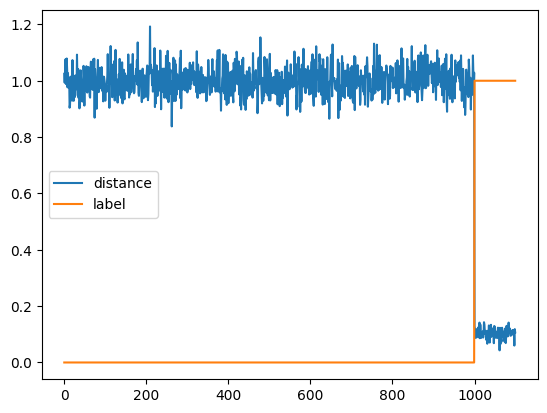

In [13]:
df.plot()

22:03:40.907 | INFO    | prefect.engine - Created task run 'generate_wheel_data-8ecf601a' for task 'generate_wheel_data'

22:03:40.940 | INFO    | Task run 'generate_wheel_data-8ecf601a' - Wheel and robot velocity data generated!

22:03:40.963 | INFO    | Task run 'generate_wheel_data-8ecf601a' - Finished in state Completed()

,wheel_speed,robot_velocity,label
0,10.248357,10.699678,0
1,9.930868,10.462317,0
2,10.323844,10.029815,0
3,10.761515,9.676532,0
4,9.882923,10.349112,0
...,...,...,...
1095,9.962118,4.867604,1
1096,10.335240,5.085177,1
1097,9.464071,5.003830,1
1098,9.223121,4.871703,1


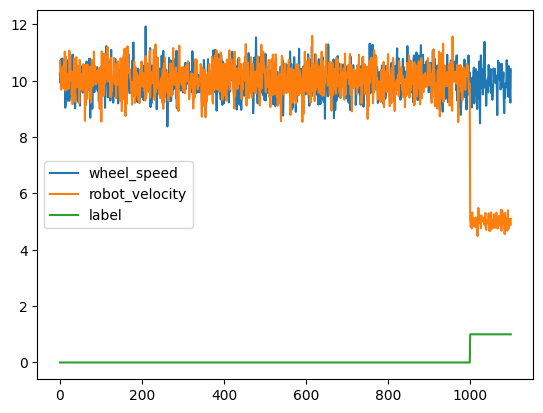

In [17]:
import slip_detection


df = await slip_detection.generate_wheel_data()
df.plot()
df